# Chapter 1a. Atomic Form Factor

In this section, we will start to look at how the scattering of an X-ray relates to determining an object's structure. This relationship is shown through a value called the atomic form factor. The goals of this section are to understand what the form factor is; how it can be found; and the physical phenomena that introduce complexities into its calculation.

## 1 Setting the scene

In [1]:
%%capture
# Suppress warning output when importing matplotlib.
%matplotlib inline
# To enable interactive figures in the IPython notebook: use '%matplotlib notebook' instead
# But this interactive mode has some display problems.

import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.animation as animation
plt.rcParams["figure.figsize"] = (8, 6)
from IPython.display import HTML
import numpy as np

In [2]:
# add path to the Modules
import sys, os
sys.path.append(os.path.join(os.getcwd(), '..', 'src'))

In [3]:
# All functions required for this notebook are contained in FormFactors
from FormFactors import *

## 2 Form Factor Definition and Calculations

The atomic form factor is the the scattering factor of an atom on incident radiation, in this case X-rays. <br>

Another way of describing the atomic form factor is the ratio of the amplitude of the wave scattered by a particular atom vs. the amplitude scattered by a single electron. It shows the amplification obtained by the presence of multiple electrons in an atom.

The atomic form factor is the Fourier transform of the electron density. 

$$ f(\mathbf{q}) = \int d\mathbf{r}\ \rho(\mathbf{r})\exp{i\mathbf{q}^{T}\mathbf{r}}$$

Consider an atom whose electron density is  gaussian $\rho(\mathbf{r}) = \rho_{0}\exp{\big(-\frac{1}{2}\mathbf{r}^{T}\Sigma^{-1}\mathbf{r}\big)}$. The form factor of that atom is the Gaussian integral:

$$ f(\mathbf{q}) = \rho_{0}\sqrt{(2\pi)^{3}|\Sigma|}\exp{\big(-\frac{1}{2}\mathbf{q}^{T}\Sigma\mathbf{q}\big)}$$

We see that it is also a Gaussian. Now if we assume spherical symmetry, $\Sigma = \sigma^{2}I$, and we are let with $$f(q) = (2\pi)^{3/2}\rho_{0}\sigma^{3}\exp{(-\frac{1}{2}\sigma^{2}q^{2})}$$

The electron density is assumed to be spherically symmetric so that the density only depends on the distance from the origin in reciprocal space. The form factor is well-approximated by a sum of Gaussians of the form:

\begin{equation}
f(q) = \sum_{i=1}^5 a_i e^{-b_i(\frac{q}{4\pi})^2}+c
\end{equation}



The Waasmaier-Kirfel coefficients (a's, b's, and c) are given in a set of tables with the calculations for the form factors for a large number of elements.

This is a reasonable approximation when the scattering wavelength is $0 \lt \lambda \lt 0.25$ $\unicode{xC5}^{-1}$.

The depends on the type of scattering. With Thomson scattering, the scattering occurs elastically so that the charged particle's kinetic energy and the photon's frequency do not measurably change. 


 


We give those parameters below for Carbon, Nitrogen, Oxygen and Phosphorus atom types:

In [4]:
atomTypeC, chargeC,  = [6.000000,  0.000000]
a1C, a2C, a3C, a4C, a5C, cC, b1C, b2C, b3C, b4C, b5C = [2.657506,  1.078079, 1.490909,  -4.241070, 0.713791, 
                                                        4.297983, 
                                                        14.780758, 0.776775, 42.086842, -0.000294, 0.239535]
atomTypeN, chargeN, = [7.000000,  0.000000]
a1N, a2N, a3N, a4N, a5N, cN, b1N, b2N, b3N, b4N, b5N = [11.893780, 3.277479, 1.858092,   0.858927, 0.912985,
                                                        -11.804902,
                                                        0.000158, 10.232723, 30.344690,  0.656065, 0.217287]
atomTypeO, chargeO, = [8.000000, 0.000000]
a1O, a2O, a3O, a4O, a5O, cO, b1O, b2O, b3O, b4O, b5O = [2.960427, 2.508818, 0.637853, 0.722838, 1.142756, 
                                                        0.027014,
                                                        14.182259, 5.936858, 0.112726, 34.958481, 0.390240]
atomTypeP, chargeP, = [15.000000, 0.000000]
a1P, a2P, a3P, a4P, a5P, cP, b1P, b2P, b3P, b4P, b5P = [1.950541, 4.146930, 1.494560, 1.522042, 5.729711, 
                                                        0.155233,
                                                        0.908139, 27.044952, 0.071280, 67.520187, 1.981173]

We now define the set of points in reciprocal space at which we evaluate the scattering:

In [5]:
q_sample = np.linspace(1e-3, 10, 1001) / (2.0 * np.pi * 0.529177206 * 2.0)

We now evaluate and plot the form factors:

In [6]:
fvC = evaluate_form_factor(q_sample, a1C, a2C, a3C, a4C, a5C, cC, b1C, b2C, b3C, b4C, b5C)
fvN = evaluate_form_factor(q_sample, a1N, a2N, a3N, a4N, a5N, cN, b1N, b2N, b3N, b4N, b5N)
fvO = evaluate_form_factor(q_sample, a1O, a2O, a3O, a4O, a5O, cO, b1O, b2O, b3O, b4O, b5O)
fvP = evaluate_form_factor(q_sample, a1P, a2P, a3P, a4P, a5P, cP, b1P, b2P, b3P, b4P, b5P)

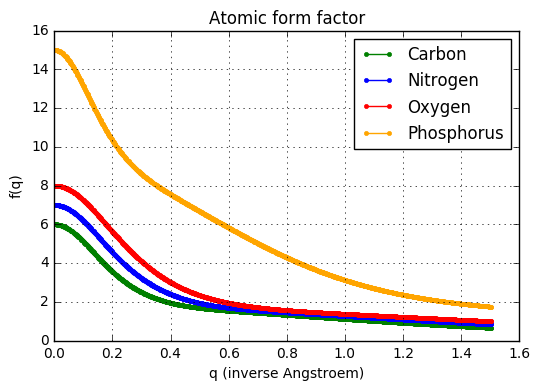

In [7]:
fig = plt.figure(figsize=(6,4), dpi=180)
ax = plt.axes()
ax = plot_form_factors(ax, q_sample, fvC, fvN, fvO, fvP, title='Atomic form factor')
plt.show()

As a result of the nature of the Fourier transform, the broader the density distribution $\rho$ in real space, the narrower distribution of the function in reciprocal space , i.e. the faster decay of the form factor.

Notice that the amplitude peak of the form factor curve is equal to the number of electrons (C: Z=6 and N: Z=7). for a larger molecule, the form factor is the sum of the individual atoms (i.e. 13 in this case).

The parameter $q$ is proportional to $\frac{\sin{\theta}}{\lambda}$. It has units of inverse angstroms because:

$$\frac{\sin{\theta}}{\lambda} = \frac{1}{2d},$$ 

the Bragg equation in which wavelength and scattering angle are inversely proportional to the resolution, as mentioned in the last section.

To reiterate, the form factor depends on the number of the electrons. Thus, the peak of 29 could relate to $Zn^+$ or $Cu$.

The longer tail of the atomic form factor curve for larger elements has to do with the smaller orbital radius of inner shell electrons due to the larger charge of the nucleus.

Note that the amplitude does not give the full details of the atomic structure, because we also need the phase information. 

## 3 Form factor complexities

### 3.1 Temperature effects

In actual cases, there will be an additional weakening by the Debye-Waller equation factor, also called the B-factor. It is a function of temperature, related to the mean displacement of a vibrating atom $<u>$,

$$B = \frac{8\pi^2}{3} <u>^2$$

As $u$ is given in $A$, the units of $B$ are $A^2$. 

B-values for normal regions in protein molecules lie between 5 (backbones) and 20 (side chains).

$$f_B(q) = f(q)\ e^{-\frac{B}{8\pi^{2}}\ q^{2}}$$

In most protein structures, it suffices to assume the average displacement is isotropic. At higher resolution, anisotropy comes into play, and $u$ is replaced by a 3 x 3 tensor $u_{ij}$.

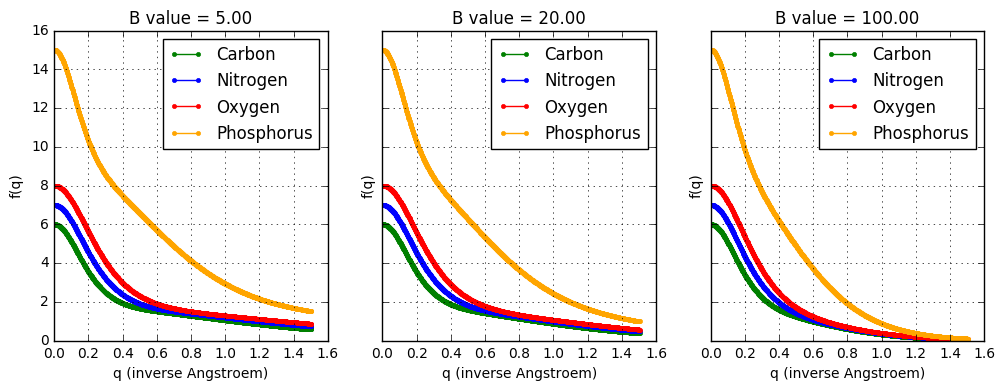

In [8]:
B_list = [5., 20., 100.]

fig, axes = plt.subplots(nrows=1, ncols=len(B_list), sharey=True, figsize=(12,4), dpi=180)
for i in np.arange(len(B_list)):
    w = get_B_attenuation_factor(q_sample, B_list[i])
    ax = axes[i]
    ax = plot_form_factors(ax, q_sample, w*fvC, w*fvN, w*fvO, w*fvP, title='B value = {:03.2f}'.format(B_list[i]))
plt.show()

Another type of effect that could be related to temperature is the fact that an atom could have several sites that it does not occupy all the time. This is modelled with an occupancy factor:

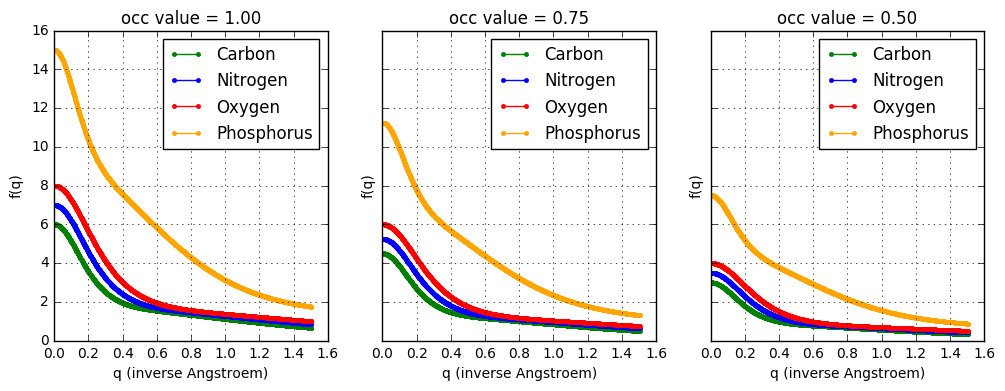

In [9]:
occ_list = [1., 0.75, 0.5]

fig, axes = plt.subplots(nrows=1, ncols=len(occ_list), sharey=True, figsize=(12,4), dpi=180)
for i in np.arange(len(occ_list)):
    w = occ_list[i]
    ax = axes[i]
    ax = plot_form_factors(ax, q_sample, w*fvC, w*fvN, w*fvO, w*fvP, title='occ value = {:03.2f}'.format(occ_list[i]))
plt.show()

### 3.2  Solvent scattering effects

Most scattering experiments in Biology are done on samples immersed in solution. The contribution from the solvent is thus often non negligible. Noting $F$ the total wave function, $A$ a normalized wave function and $\rho$ the electron density in electron per cubic Angstroem:
$$ F(\mathbf{q}) = \rho_{u}A_{solute}(\mathbf{q}) + \rho_{v}A_{solvent}(\mathbf{q}) $$

Let's illustrate with the example of a hard sphere solute immersed in a hard sphere of solvent. We will note $A_{R}$ the wave function of a hard sphere of radius $R$. We will look at the sample through a window of size:

In [10]:
window_size=2e4 # in Angstroem (this is just for visualization purposes)

Let's first consider the case of a small 100 Angstroem radius solute and constant electron density 0.415 e.A^3 in vacuum

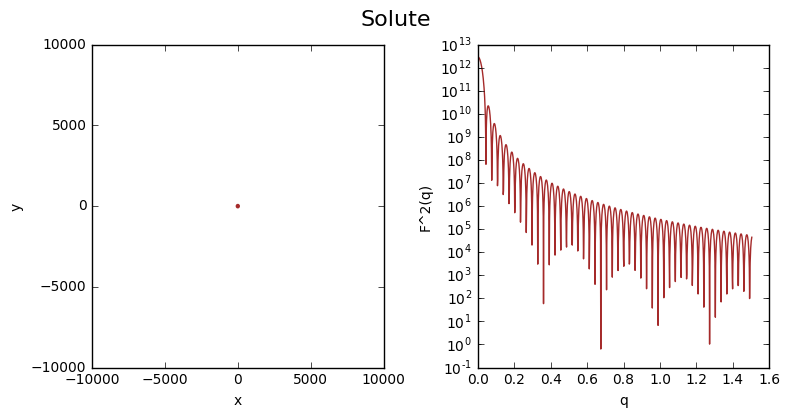

In [11]:
solute  = HardSphere(q_sample, radius=1e2, electron_density=0.415)
show_sphere(q_sample, solute.R, solute.intensity(),  size=window_size, color='brown', title='Solute')

Let's introduce some measurement blur to smooth the curve

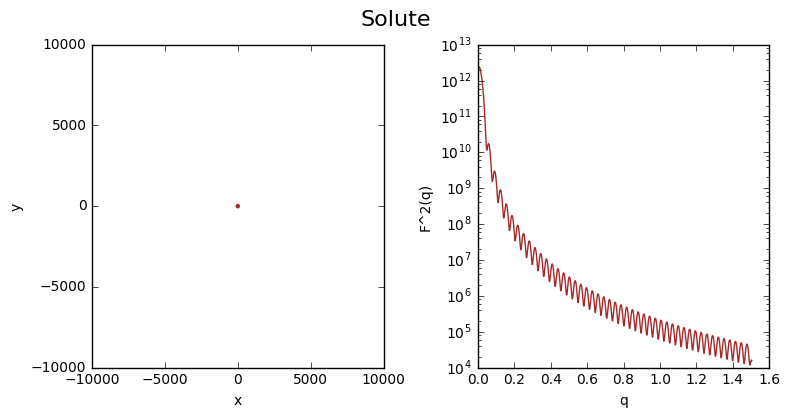

In [12]:
show_sphere(q_sample, solute.R, blur_intensity(solute.intensity()), size=window_size, color='brown', title='Solute')

#### 3.2.1 Bulk-solvent

Now we consider a huge 1 micron radius solvent sphere of electron density 0.334 e/A3

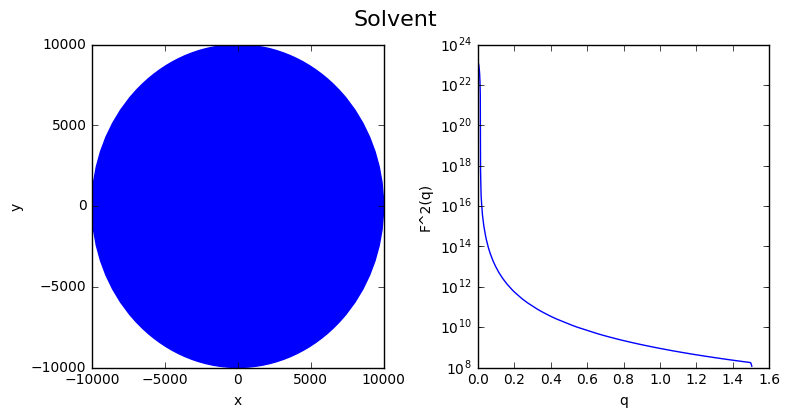

In [13]:
solvent = HardSphere(q_sample, radius=1e4, electron_density=0.334)
show_sphere(q_sample, solvent.R, blur_intensity(solvent.intensity()), size=window_size, color='blue',  title='Solvent')

We see that the solvent scatters orders of magnitude stronger. 

Now let's see what happens with the solvated solute. For that we must displace (or exclude) the solvent volume occupied by the solute. If the solvent and solute boundary is sharp (no interpenetration):
$$ F(\mathbf{q}) = \rho_{u}A_{R_{u}}(\mathbf{q}) + \rho_{v}A_{R_{v}}(\mathbf{q})-\rho_{v}A_{R_{u}}(\mathbf{q})$$
In terms of intensity, noting $\alpha = 1 - \frac{\rho_{v}}{\rho_{u}}$ this leads us to:
$$ I(\mathbf{q}) = \big|F_{R_{v}}(\mathbf{q}) + \alpha F_{R_{u}}(\mathbf{q})\big|^{2}$$

We summarize in the plot below:

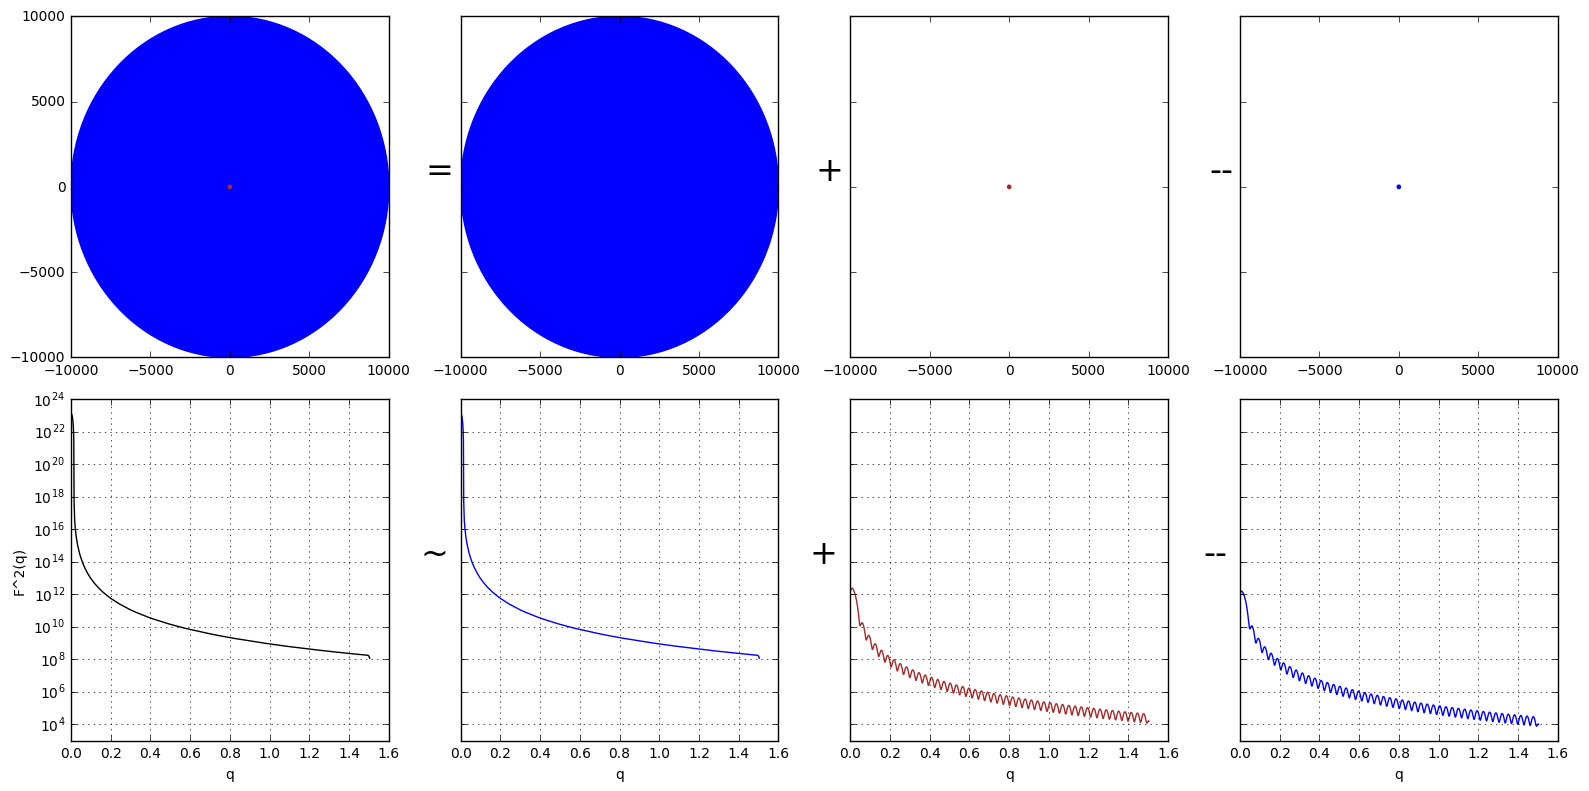

In [14]:
alpha = 1. - solvent.rho0/solute.rho0
form_factor = solvent.form_factor() + alpha*solute.form_factor()

intensity_solvated = blur_intensity(form_factor**2)
intensity_solvent  = blur_intensity(solvent.intensity())
intensity_solute   = blur_intensity(solute.intensity())

plot_hard_spheres_summary(q_sample, intensity_solvated, intensity_solvent, intensity_solute, 
                          intensity_solute*(solvent.rho0/solute.rho0)**2,
                          R_solute=solute.R, R_solvent=solvent.R, size=window_size)

As we illustrate below, subtracting the intensity scattered by a volume of pure solvent to the intensity of the same volume containing the solute yields the intensity scattered by the solute in vacuum, up to a factor. That factor corresponds to rescaling from the absolute density of the solute to its excess density in the context of the solvent.

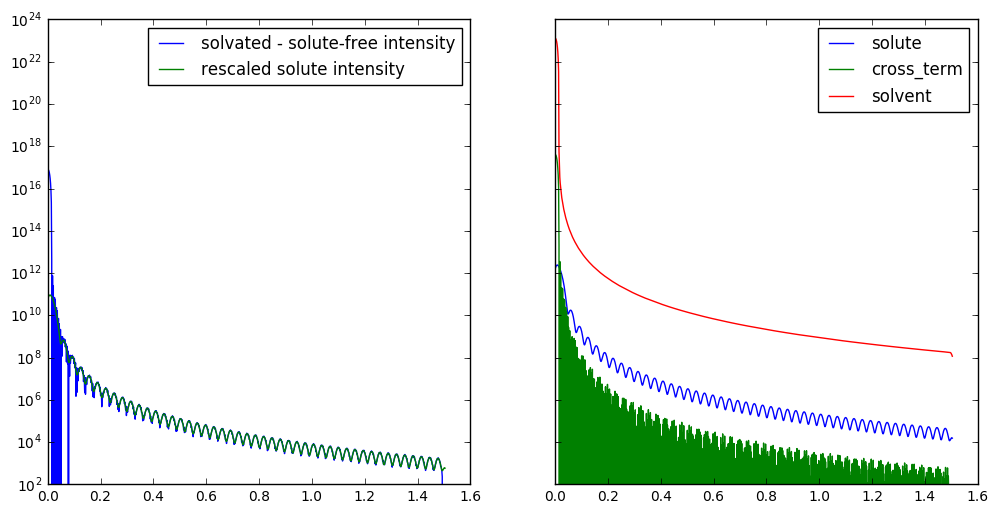

In [15]:
intensity_cross    = 2*blur_intensity(solute.form_factor()*solvent.form_factor())

plot_excess_intensity(q_sample, intensity_solvated, intensity_solvent, 
                      intensity_solute, alpha*alpha*intensity_solute, intensity_cross)

#### Babinet principle
What we just illustrated applies well in the case of diluted solution scattering (SAXS/WAXS) where the experiment actually consists of collecting two scattering intensities: one of pure solvent subtracted to the diluted solution. It is somewhat related to the Babinet principle that we illustrate in a simpler manner here. The Babinet principle states that the diffraction pattern from an opaque body is identical to that from a hole of the same size and shape, except for the overall forward beam intensity. We illustrate it below with our hard spheres: we compute the pattern of the inner sphere (in red) and that of its complementary, the outer_shell (in blue), and their ratio (in grey). We see that they are proportional, meaning that we should be able to approximate the scattering from the solvent given the solute, up to a proportionality constant. 

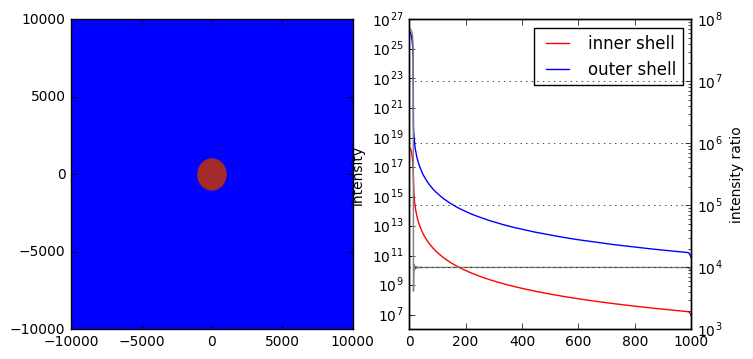

In [16]:
whole_volume = HardSphere(q_sample, radius=1e5, electron_density=1.)
inner_shell  = HardSphere(q_sample, radius=1e3, electron_density=1.)

inner_shell_pattern = blur_intensity(inner_shell.intensity(), kernel=30)
outer_shell_pattern = blur_intensity(np.abs(whole_volume.form_factor()-inner_shell.form_factor())**2, kernel=30)

plot_babinet(q_sample, outer_shell_pattern, inner_shell_pattern, R_outer=whole_volume.R, R_inner=inner_shell.R, size=window_size)

##### Exponential scaling
While we illustrated it at the intensity level, the Babinet principle is often interpreted at the form factor level. In crystallography, one of the two most popular bulk-solvent models is a litteral definition of the Babinet principle with a twist:
$$F_{solvent}(\mathbf{q}) = - \lambda(\mathbf{q})F_{solute}(\mathbf{q}) $$
A litteral interpretation of the Babinet principal would set $\lambda$ constant, but it is usually set to exponentially decay with $q$, hence the name "exponential scaling model": $\lambda(\mathbf{q}) = \lambda_{0}\ e^{-\frac{1}{2}\beta_{0}q^{2}}$. One way to interpret this decay is to consider that the boundary between solute and solvent is soft.

#### Flat bulk-solvent model
While easy to implement, the *exponential scaling* model has been shown to perform poorly at resolutions better than 15-20 Angstroems. A popular alternative approach consists in defining the solvent form factor as complementary to a flattened version of the solute, with the justification that after all the solvent has in average a uniform distribution. Defining a mask or envelope of the solute with constant density, one then gets a very similar expression to the exponential scaling model: 
$$F_{solvent}(\mathbf{q}) = - \lambda(\mathbf{q})F_{mask}(\mathbf{q}) $$
In general this model performs better.

##### Dummy atom bulk-solvent model
Instead of calculting the total envelope of the object, it has been proposed to "break it" in individual atomic contributions, effectively updating the atomic form factors with their own corrective term, where we note $v_{i}$ the volume displace by atom $i$, $\rho_{v}$ is the electron density of the solvent and $f_{v}$ is the form factor of a dummy atom of solvent.
$$f'_{i}(\mathbf{q}) = f_{i}(\mathbf{q}) - v_{i}\rho_{v}f^{v}(\mathbf{q})$$
Several models for the dummy form factor have been proposed, from hard sphere to soft gaussian sphere. The latter has been adopted in most popular package for SAXS modelling for example, with a few added tricks like a q-dependent atomic volume whose parameters can be adjusted.

##### Final thought on bulk-solvent modelling
There has been and still is room for creativity... There is no silver bullet and most methods have strong inconvenients. Maybe a promising approach is the one proposed by Jochen Hub for SAXS/WAXS modelling, where everything is treated explicitely without the need to resort to models. Whether this is an overkill or not is subject to debate.

#### 3.2.2 Hydration layer
Not all solvent around a solute is bulk-like. The solvent shell around it usually sees structured water stabilized by interactions with the solute charged atoms. Several levels of approximations have been introduced through the years to described the hydration layer(s) around solvated scattering objects.

##### Implicit solvent models
A popular approach consists in treating the solvent implicitely, in a way similar to what we have described for the bulk-solvent model above. Several models have been implemented:
- **constant thickness layer**

In this model, the hydration layer is modelled as a thick shell of constant width and density around the solute. This model is most popular in the SAXS/WAXS field where various implementations have been proposed (CRYSOL, SASTBX and PEPSI-SAXS)

- **atomic contributions**

Alternatively, it has been proposed (in FoXS) to generalize the atomic bulk-solvent formalism and break down the contribution of the hydration layer to the scattering in atomic contributions. The atomic form factors of each atom now has an additional term, proportional to its solvent accessible surface area and to the form factor of a water molecule.

- **more sophisticated approaches**

While the previous approaches account for the presence of an hydration layer, they can not reflect the fact that hydration layers are not homogeneous and their local density is both a function of the distance to the solute's surface, but also of the nature of the exposed atoms. In other words, the excess of water at the solute's surface depends on the hydrophobicity of the exposed surface. A few models have been proposed to model the average profile of the hydration layer that take into account the electrostatic interactions between the solute and the solvent (and the solvent with itself): the RISM approach and a generalized Poisson-Boltzmann approach (in AquaSAXS).

##### Explicit solvent models
Another, more costly, approach consists in embedding the solute in a simulation box full of water molecules and perform a Molecular Dynamics simulation. The solvent density can then be averaged over the simulations and used to compute both the bulk solvent and the hydration layer contributions to the scattering (in WAXSiS).

### 3.3 Anomalous scattering (dispersion)

So far, we have assumed that all the electrons can be treated as free electrons. However, stronger scattering can be caused by a resonance effect; when the photon energy of the X-ray is close to an absorption edge (i.e. the frequency of the X-ray is close to the frequency of bound electrons). That means that the form factor equation becomes:



$$f(q) = f_0(q) + f' + if''$$


The first part is the base atomic form factor and the second two terms relate to the dispersion correction. 

Don't worry too much about the calculation of anomalous dispersion--it is dependent on X-ray wavelength, atomic element, as well as other factors.

It means though that the amplitude of the scattering cannot strictly be proportional to the Fourier transform of the electron density, when we take dispersion into account. 

## 4 Summary

While the form factors are important for ordinary users of crystal structure analysis and theory, is not necessary to calculate all of them. The form factors of all atoms and many ions have been tabulated and listed in the "International Tables of Crystalgraphy, Vol. C" edited by the International Union of Crystallography,

Furthermore, standard application software for crystal structure analysis holds the data for the atomic form factors inside. Thus, the users only need to specify the elements included in the crystal.

Your turn: which is the case where the diffraction of a crystal can NOT be approximated by the sum of the scattering of atoms:

    A. when the effect of the finite size of a crystal cannot be neglected

    B. when the effects of chemical bonds cannot be neglected 

    C. when the effect of anomalous dispersion cannot be neglected

    D. when the thermal vibration of atoms cannot be neglected